In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
def visu_plots(df, variable):
    plt.figure(figsize=(16, 4))
    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')    
    plt.show()

## Préparation des données crédit immobilier 

In [4]:
credit = pd.read_csv("credit_immobilier_ISF.csv")

In [5]:
credit.head()

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,telephone,defaillant,revenufinal
0,< 0 Euro,6,critique,ameublement,1169,inconnu,> 7 annees,4.0,67.0,aucun,proprietaire,2,qualifie,1,oui,non,8135.110140
1,1 - 200 Euro,48,bon,ameublement,5951,< 100 Euro,1 - 4 annees,2.0,22.0,aucun,proprietaire,1,qualifie,1,oui,oui,19334.307686
2,inconnu,12,critique,education,2096,< 100 Euro,4 - 7 annees,3.0,49.0,aucun,proprietaire,1,non_qualifie,2,oui,non,4864.954258
3,< 0 Euro,42,bon,ameublement,7882,< 100 Euro,4 - 7 annees,4.0,45.0,aucun,autre,1,qualifie,2,oui,non,22152.947349
4,< 0 Euro,24,pauvre,auto,4870,< 100 Euro,1 - 4 annees,4.0,53.0,aucun,autre,2,qualifie,2,oui,oui,23900.704144


In [6]:
np.where(credit['telephone'] !='oui')

(array([], dtype=int64),)

Tout le monde a un téléphone, cette colonne est inutile donc on la supprime.

In [7]:
credit = credit.drop('telephone',axis = 1)

## Informations - Statistiques générales 

In [8]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   compte_courant            1021 non-null   object 
 1   duree_emprunt_mois        1021 non-null   int64  
 2   historique_credit         1021 non-null   object 
 3   raison                    1021 non-null   object 
 4   montant                   1021 non-null   int64  
 5   compte_epargne            1020 non-null   object 
 6   duree_emploi              1021 non-null   object 
 7   annees_presence_logement  1018 non-null   float64
 8   age                       1020 non-null   float64
 9   autre_credit              1021 non-null   object 
 10  logement                  1021 non-null   object 
 11  nbre_emprunts_actuels     1021 non-null   int64  
 12  job                       1018 non-null   object 
 13  dependants                1021 non-null   object 
 14  defailla

Stats variables numeric 

In [9]:
credit.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
duree_emprunt_mois,1021.0,20.770813,12.050318,4.000000,12.000000,18.000000,24.000000,72.000000
montant,1021.0,3250.088149,2830.788792,250.000000,1352.000000,2299.000000,3966.000000,18424.000000
annees_presence_logement,1018.0,2.844794,1.104864,1.000000,2.000000,3.000000,4.000000,4.000000
age,1020.0,35.491176,11.395078,19.000000,27.000000,33.000000,42.000000,75.000000
nbre_emprunts_actuels,1021.0,1.409403,0.576390,1.000000,1.000000,1.000000,2.000000,4.000000
revenufinal,1021.0,12273.073874,11200.509536,734.476054,5192.478646,8615.582896,15559.590686,79354.527366


Stats variables catégorielles 

In [10]:
credit.describe(include ='object')

,compte_courant,historique_credit,raison,compte_epargne,duree_emploi,autre_credit,logement,job,dependants,defaillant
count,1021,1021,1021,1020,1021,1021,1021,1018,1021,1020
unique,4,5,6,5,6,4,4,5,3,2
top,inconnu,bon,ameublement,< 100 Euro,1 - 4 annees,aucun,proprietaire,qualifie,1,non
freq,402,535,486,611,349,834,731,648,864,717


In [11]:
mask = False
for col in credit.columns : mask = mask | credit[col].isnull()
credit_nulls = credit[mask]
credit_nulls 

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,defaillant,revenufinal
29,inconnu,7,critique,ameublement,1280,< 100 Euro,> 7 annes,NaN,NaN,2,qualifie,1,oui,oui,NaN,6584.168778
413,inconnu,15,bon,auto,1430,500 - 1000 Euro,> 7 annees,NaN,31.0,aucun,proprietaire,2,qualifie,2,non,6493.120171
458,inconnu,10,pauvre,business,2440,NaN,4 - 7 annees,1.0,29.0,aucun,proprietaire,2,qualifie,1,oui,3604.960438
709,1 - 200 Euro,18,pauvre,auto,6300,< 100 Euro,> 7 annees,NaN,42.0,aucun,autre,1,qualifie,1,oui,31068.029379
826,1 - 200 Euro,8,bon,business,907,< 100 Euro,< 1 annee,2.0,26.0,aucun,proprietaire,1,NaN,1,non,3070.511597
853,inconnu,4,bon,ameublement,601,< 100 Euro,< 1 annee,3.0,23.0,aucun,locataire,1,NaN,2,non,1056.317863
858,inconnu,18,bon,renonvations,1943,< 100 Euro,< 1 annee,4.0,23.0,aucun,proprietaire,1,NaN,1,oui,9862.654808


### Traitement des données manquantes

In [12]:
credit_na = (credit.isnull().sum()/len(credit))*100
credit_na

compte_courant              0.000000
duree_emprunt_mois          0.000000
historique_credit           0.000000
raison                      0.000000
montant                     0.000000
compte_epargne              0.097943
duree_emploi                0.000000
annees_presence_logement    0.293830
age                         0.097943
autre_credit                0.000000
logement                    0.000000
nbre_emprunts_actuels       0.000000
job                         0.293830
dependants                  0.000000
defaillant                  0.097943
revenufinal                 0.000000
dtype: float64

On voit que aucune colonne n'a plus de 50% de données manquantes.

In [13]:
credit_without_na = credit.dropna()
print('On a perdu ', credit.shape[0] - credit_without_na.shape[0],'données')
print("Pour le peu de données que l'on perd on décide de ne pas remplacer ces données.")

On a perdu  7 données
Pour le peu de données que l'on perd on décide de ne pas remplacer ces données.


In [14]:
credit_without_na['compte_courant'].value_counts()

inconnu         397
< 0 Euro        280
1 - 200 Euro    274
> 200 Euro       63
Name: compte_courant, dtype: int64

In [15]:
for col in credit_without_na.columns:   
    if credit_without_na[col].dtypes == 'object':        
        credit_without_na[col] = pd.factorize(credit_without_na[col])[0]

Ici on a changé les catégories en facteurs.

### Traitement des outliers

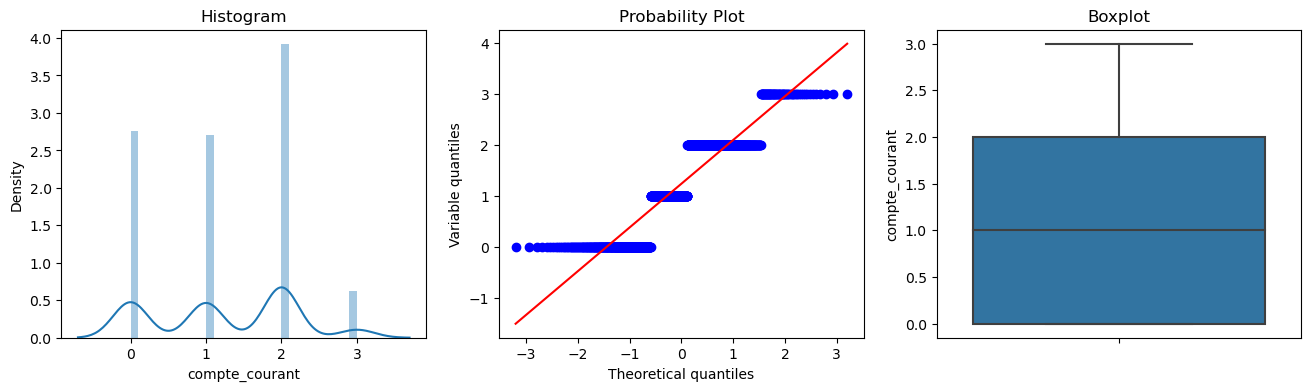

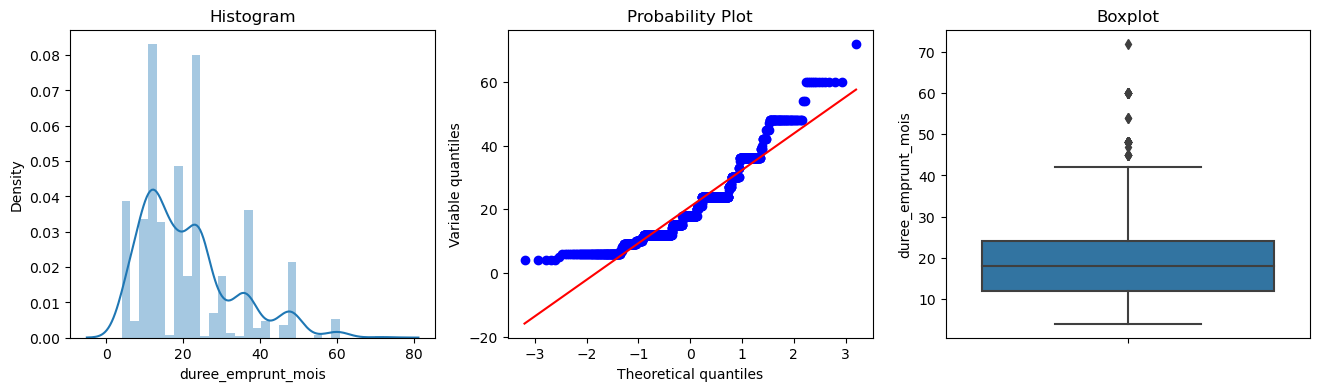

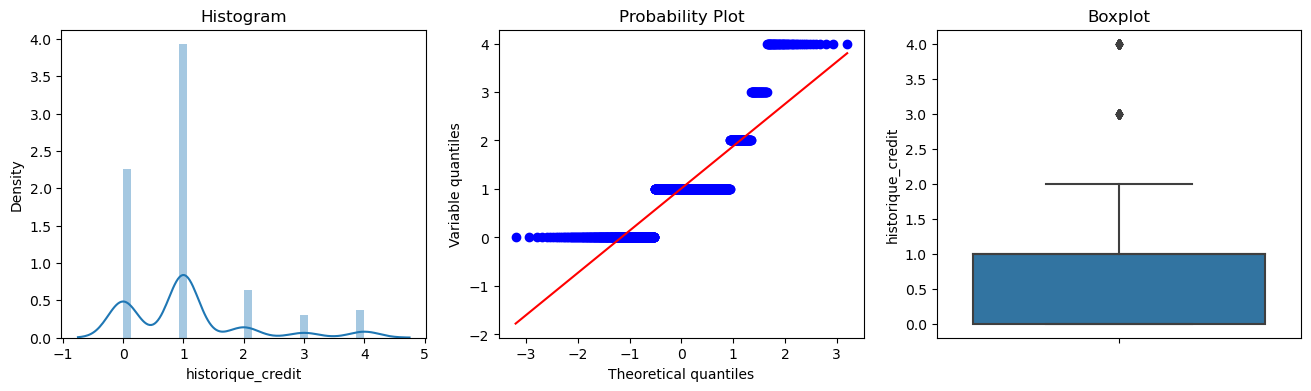

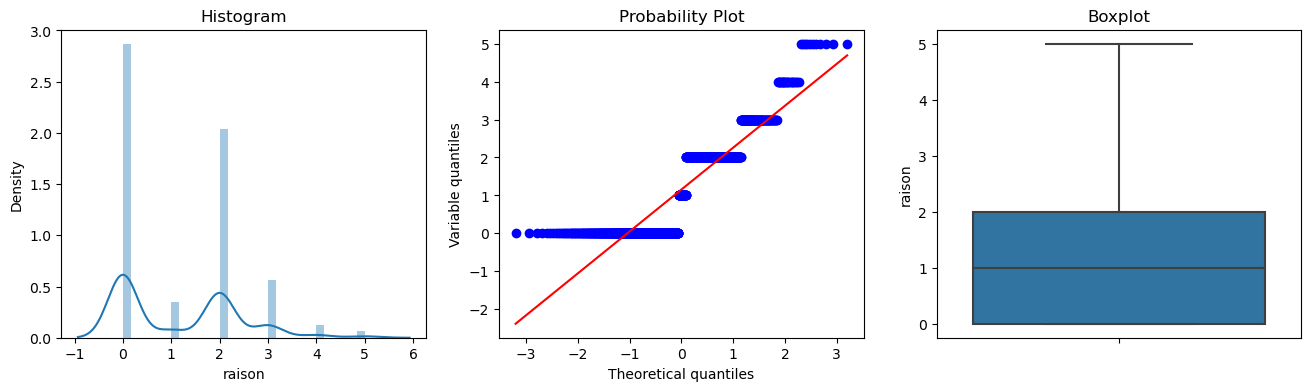

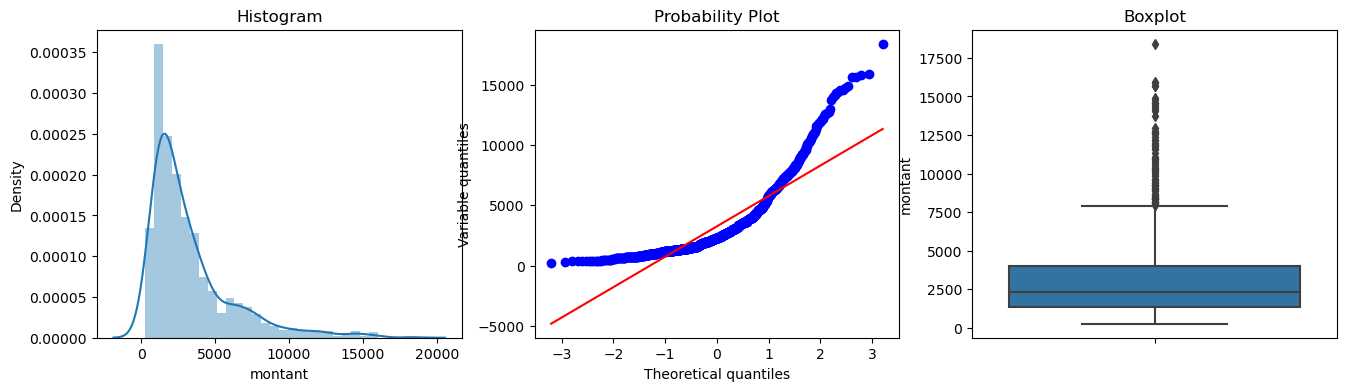

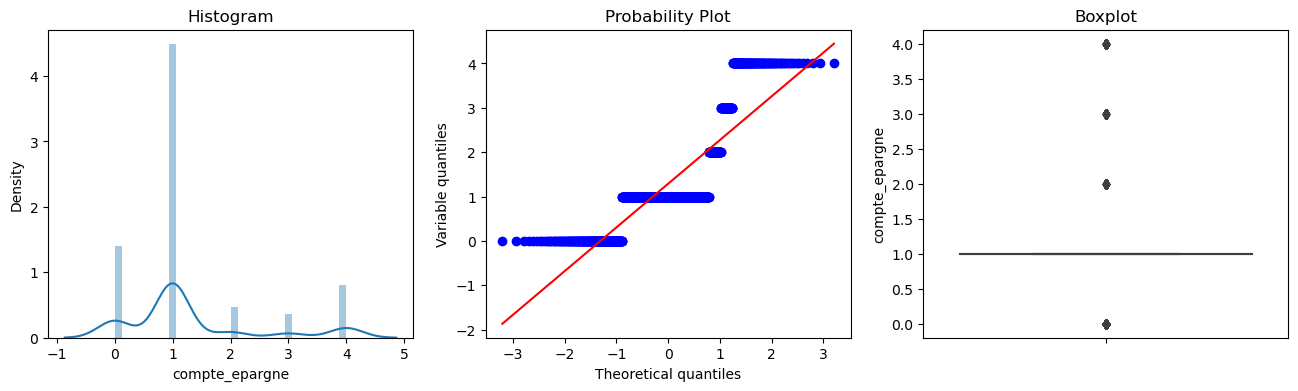

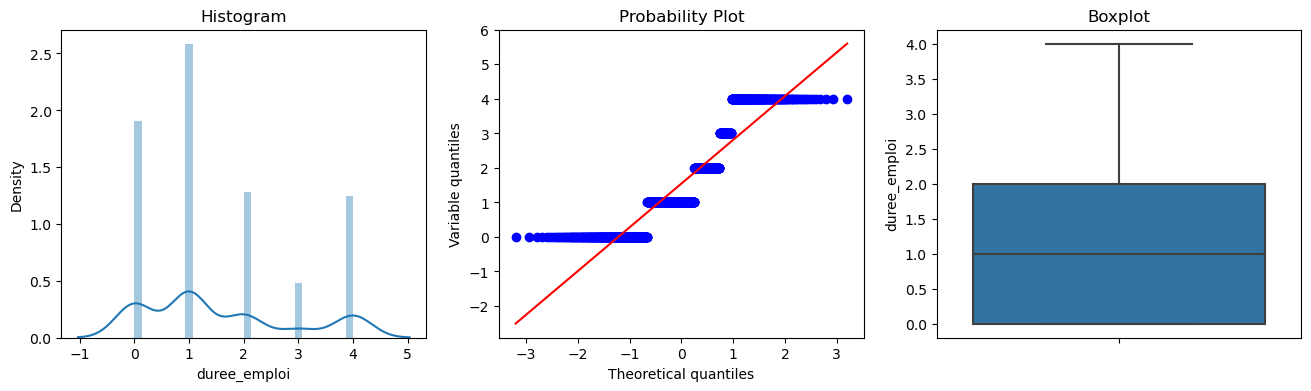

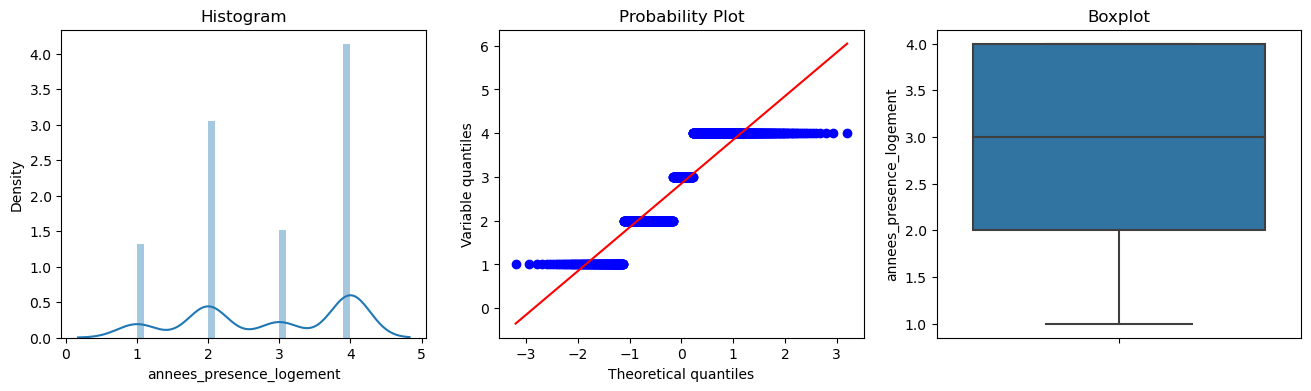

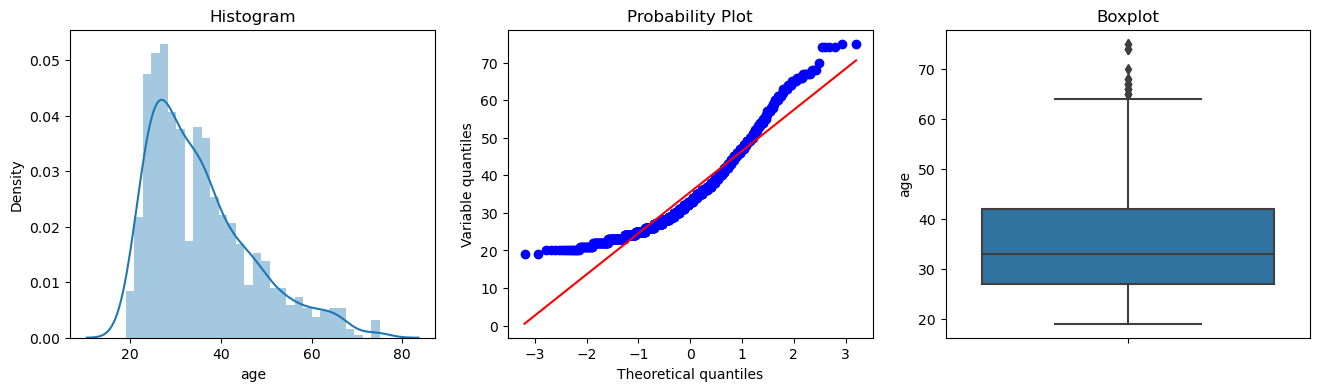

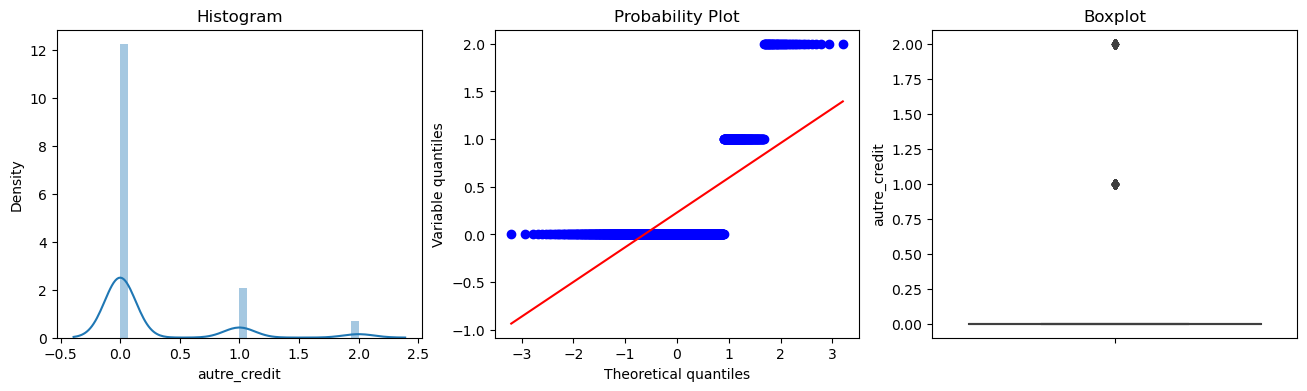

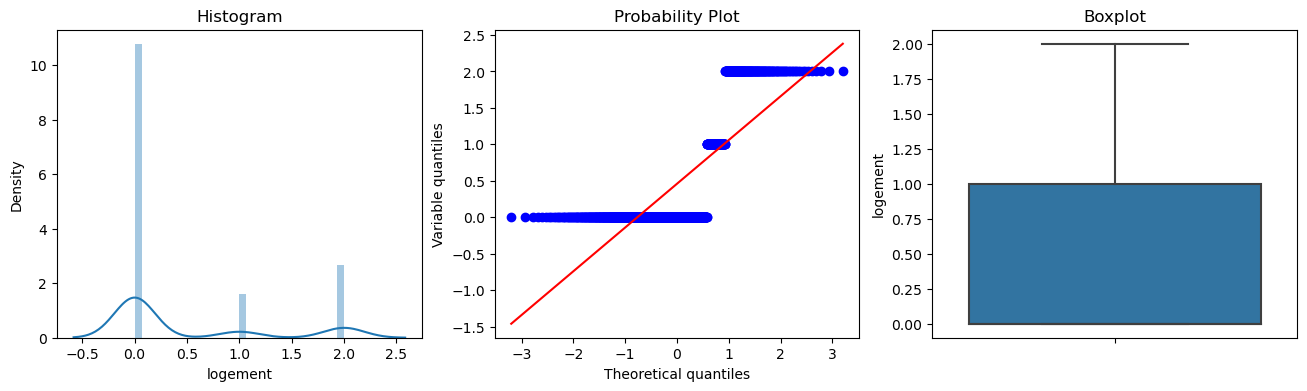

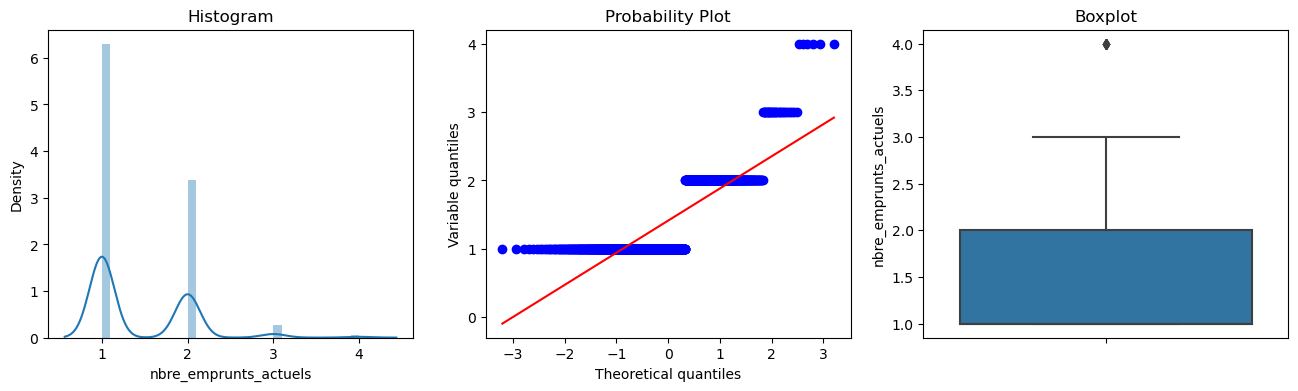

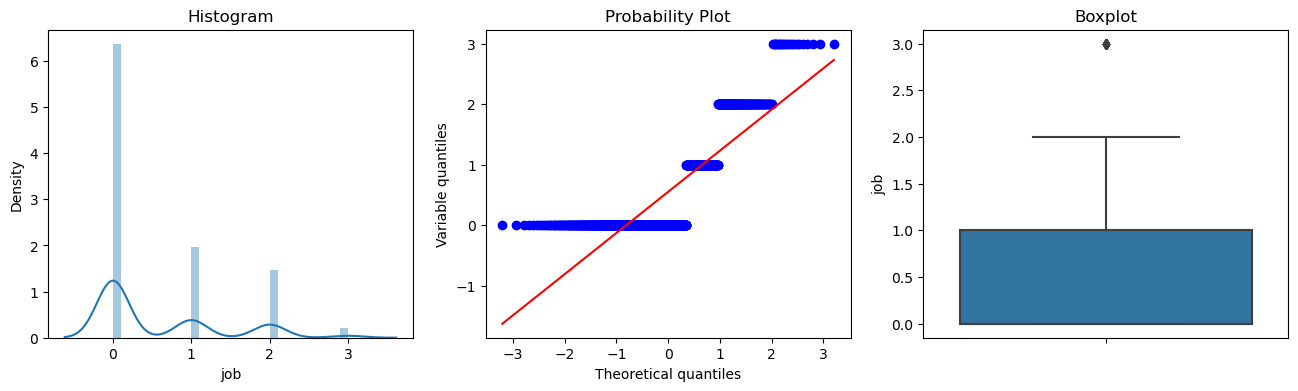

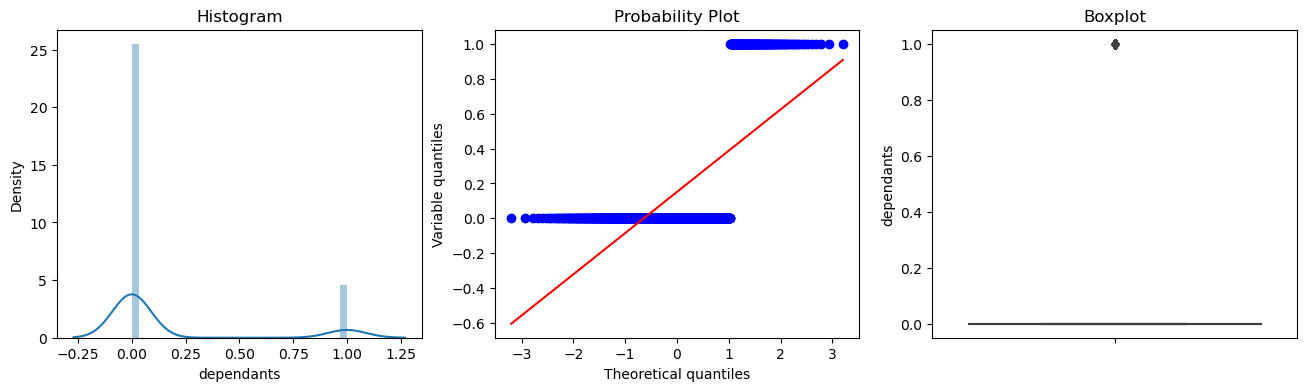

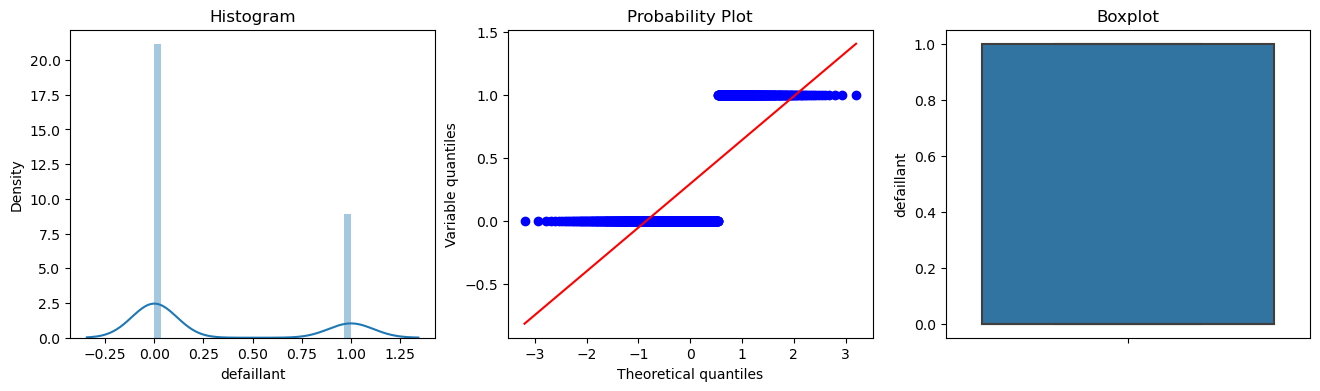

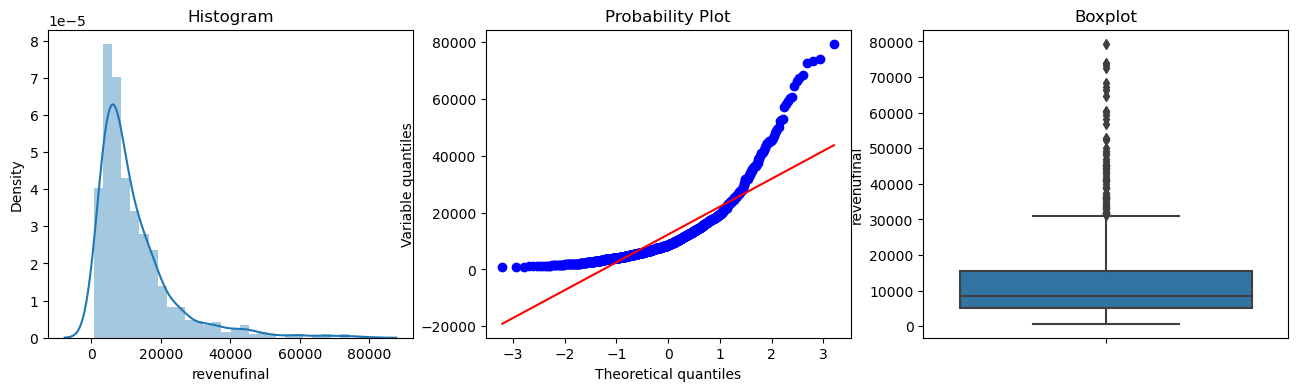

In [16]:
for i in credit_without_na.columns :
    visu_plots(credit_without_na, i)

On fait le choix de supprimer les valeurs extrèmes en retirant les données qui prennent des valeurs dans les quantiles 5% et 95 % 

In [17]:
Q1 = credit_without_na.quantile(0.05)
Q3 = credit_without_na.quantile(0.95)
IQR = Q3 - Q1
outlier_threshold = Q3 + 1.5 * IQR
outlier_rows = credit_without_na[(credit_without_na > outlier_threshold).any(axis=1)].index
credit_without_na.drop(outlier_rows)

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,defaillant,revenufinal
0,0,6,0,0,1169,0,0,4.0,67.0,0,0,2,0,0,0,8135.110140
1,1,48,1,0,5951,1,1,2.0,22.0,0,0,1,0,0,1,19334.307686
2,2,12,0,1,2096,1,2,3.0,49.0,0,0,1,1,1,0,4864.954258
3,0,42,1,0,7882,1,2,4.0,45.0,0,1,1,0,1,0,22152.947349
4,0,24,2,2,4870,1,1,4.0,53.0,0,1,2,0,1,1,23900.704144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,2,45,0,2,4576,4,3,4.0,27.0,0,0,1,0,0,0,17281.972830
1017,1,45,0,2,4576,4,3,4.0,27.0,0,0,1,0,0,0,23544.389153
1018,2,15,0,2,5045,0,0,4.0,59.0,0,0,1,0,0,0,6247.903416
1019,1,15,4,2,1234,4,1,2.0,25.0,0,2,1,0,0,1,3702.608164


## Analyse univariée

Histogrammes variables numériques

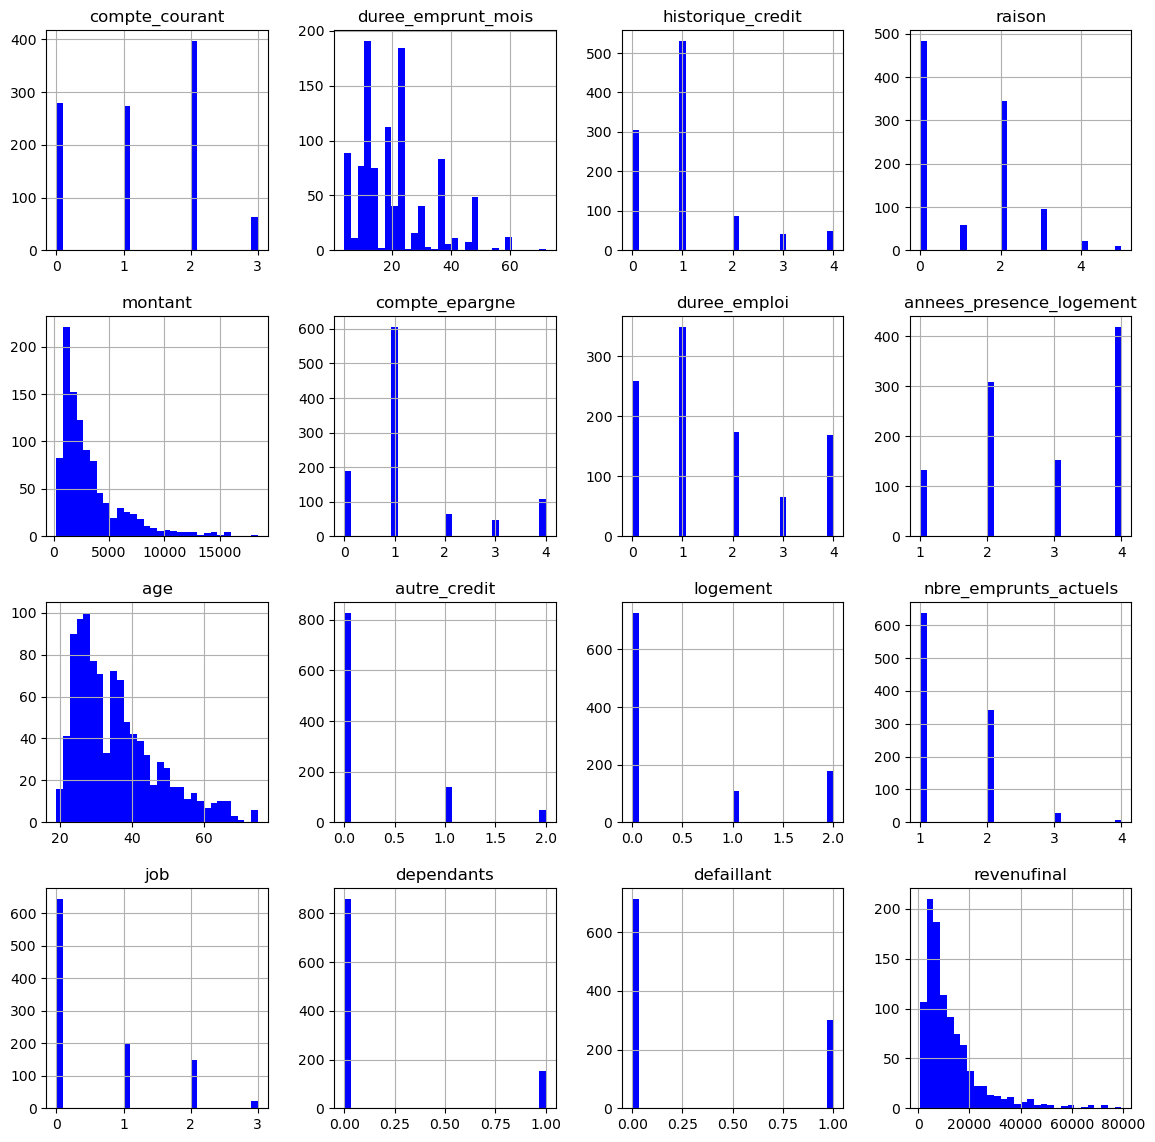

In [18]:
credit_without_na.hist(bins = 30, figsize = (14,14), color = 'b');

Histogrammes variables catégorielles

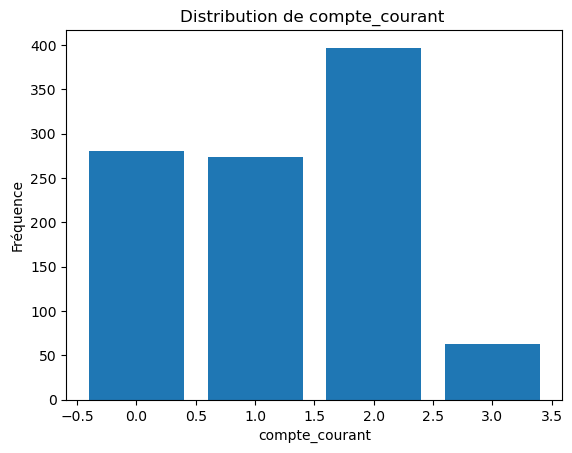

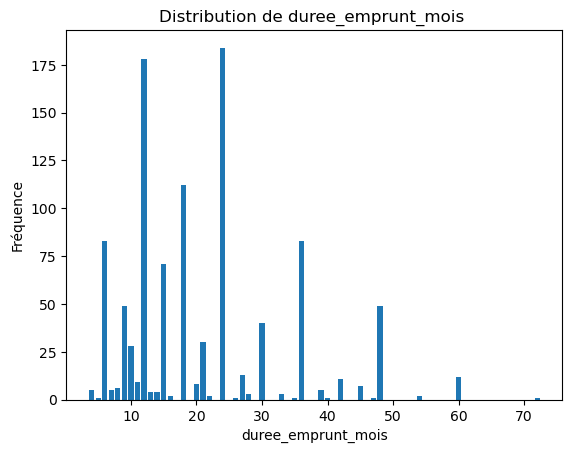

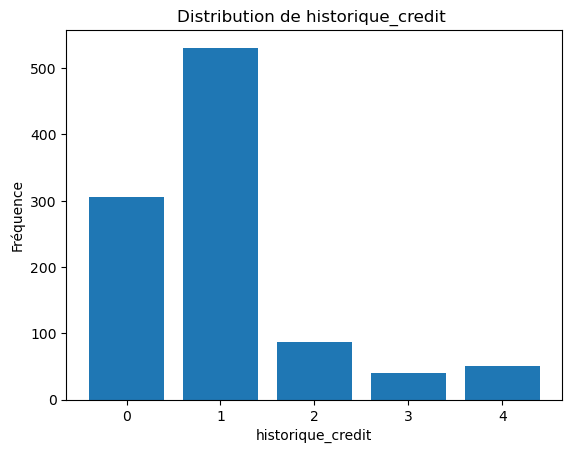

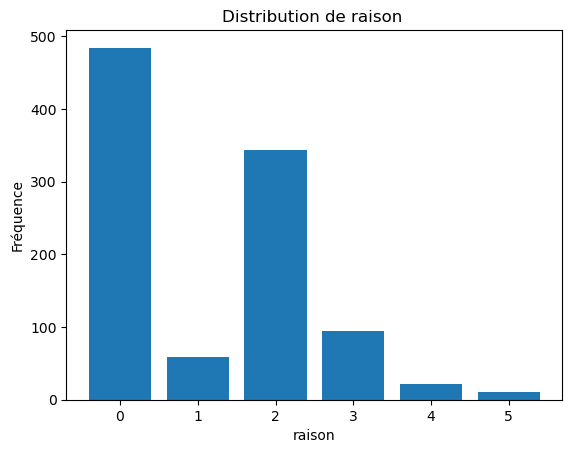

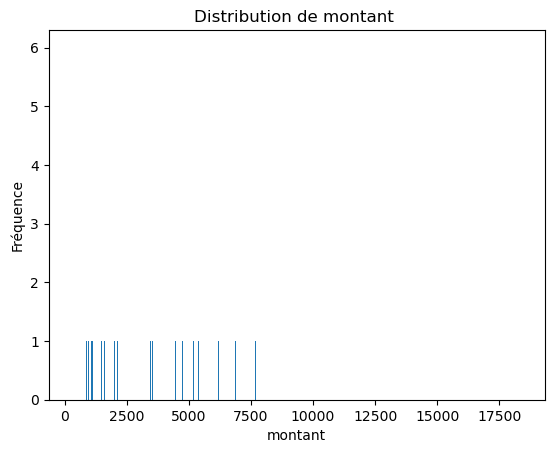

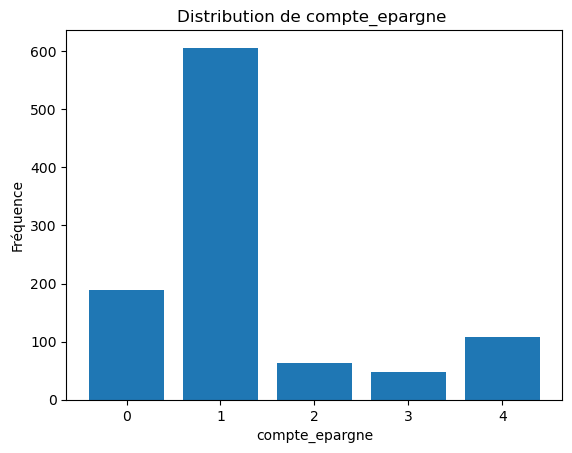

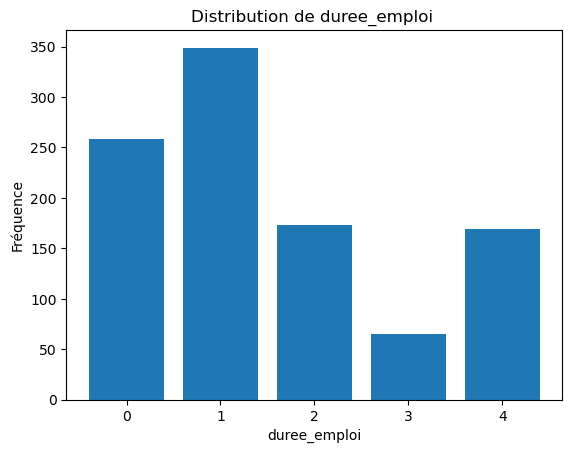

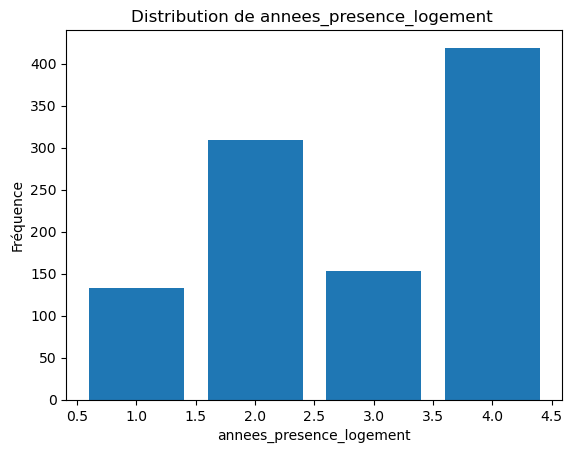

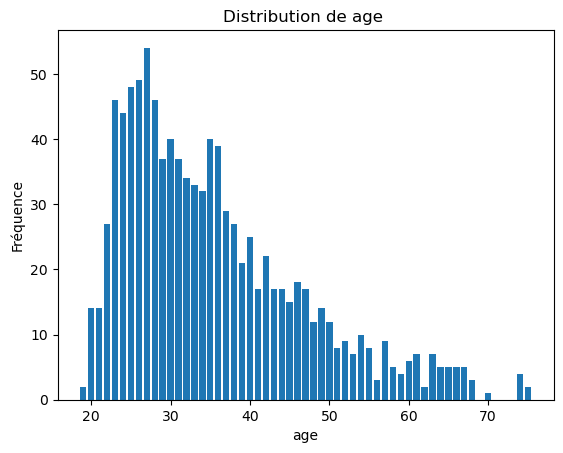

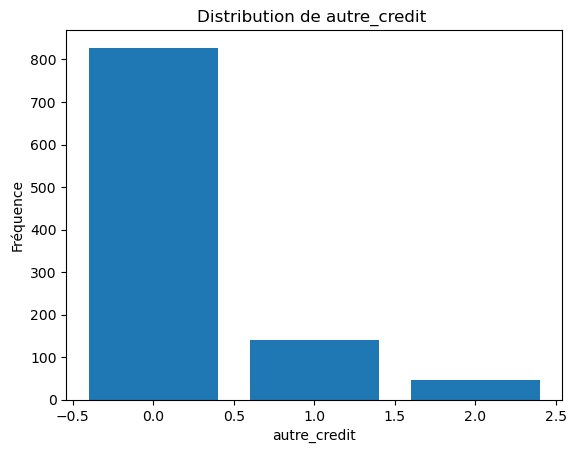

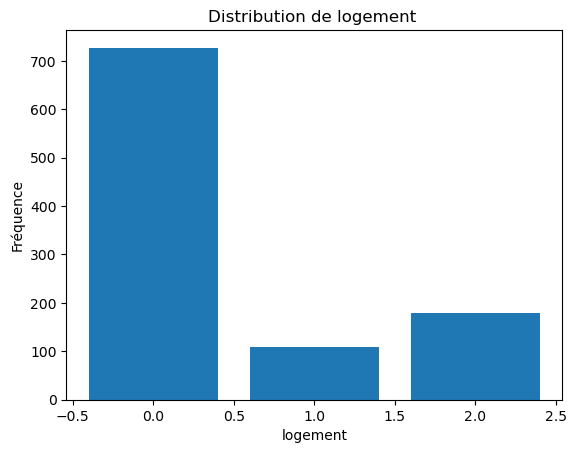

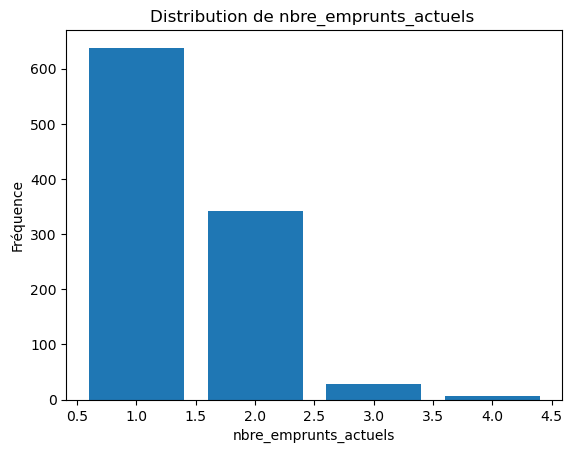

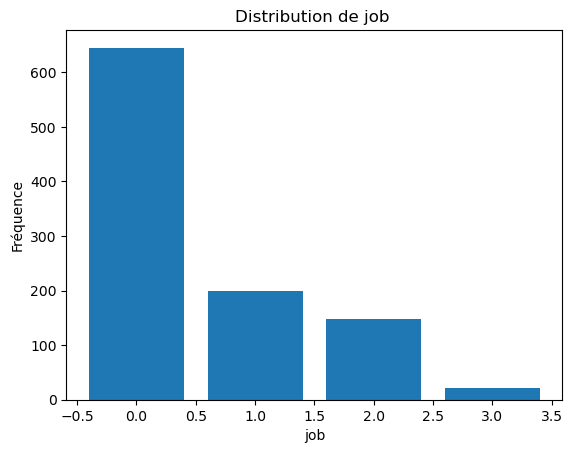

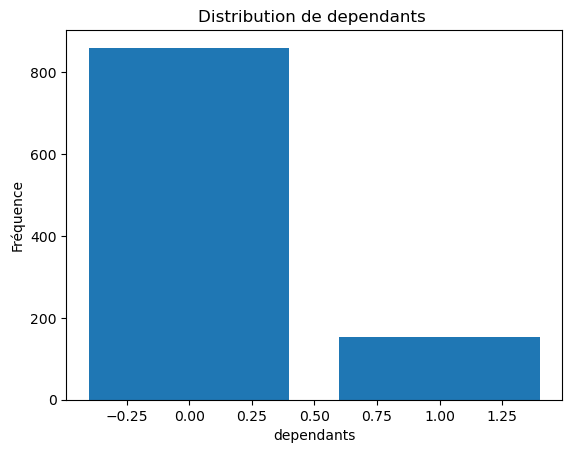

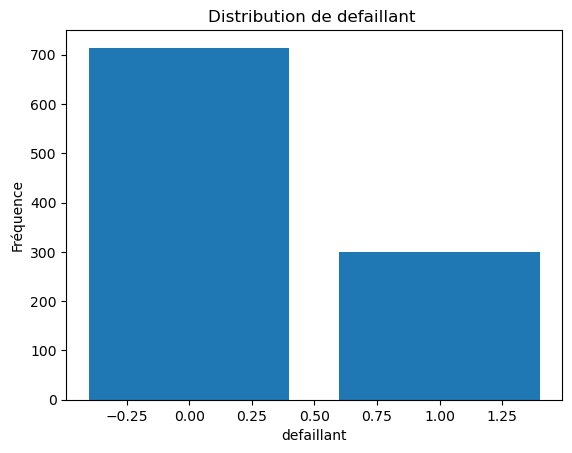

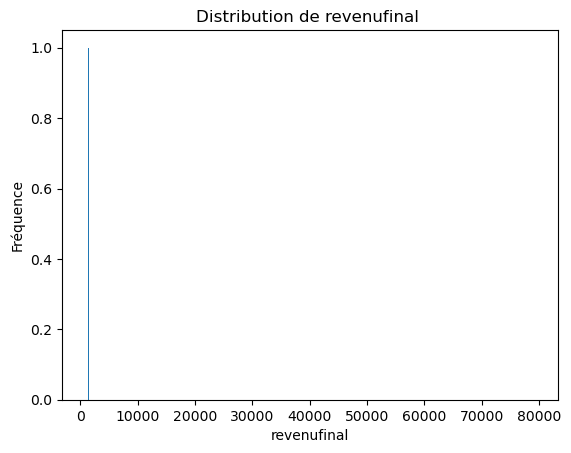

In [19]:
for i in credit_without_na.columns:
    counts = credit_without_na[i].value_counts()
    # Création du graphe en barres pour visualiser la distribution
    plt.bar(counts.index, counts.values)
    plt.title(f'Distribution de {i} ')
    plt.xlabel(i)
    plt.ylabel('Fréquence')
    plt.show()

In [20]:
credit_without_na

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,defaillant,revenufinal
0,0,6,0,0,1169,0,0,4.0,67.0,0,0,2,0,0,0,8135.110140
1,1,48,1,0,5951,1,1,2.0,22.0,0,0,1,0,0,1,19334.307686
2,2,12,0,1,2096,1,2,3.0,49.0,0,0,1,1,1,0,4864.954258
3,0,42,1,0,7882,1,2,4.0,45.0,0,1,1,0,1,0,22152.947349
4,0,24,2,2,4870,1,1,4.0,53.0,0,1,2,0,1,1,23900.704144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,2,45,0,2,4576,4,3,4.0,27.0,0,0,1,0,0,0,17281.972830
1017,1,45,0,2,4576,4,3,4.0,27.0,0,0,1,0,0,0,23544.389153
1018,2,15,0,2,5045,0,0,4.0,59.0,0,0,1,0,0,0,6247.903416
1019,1,15,4,2,1234,4,1,2.0,25.0,0,2,1,0,0,1,3702.608164


### Analyse des correlations

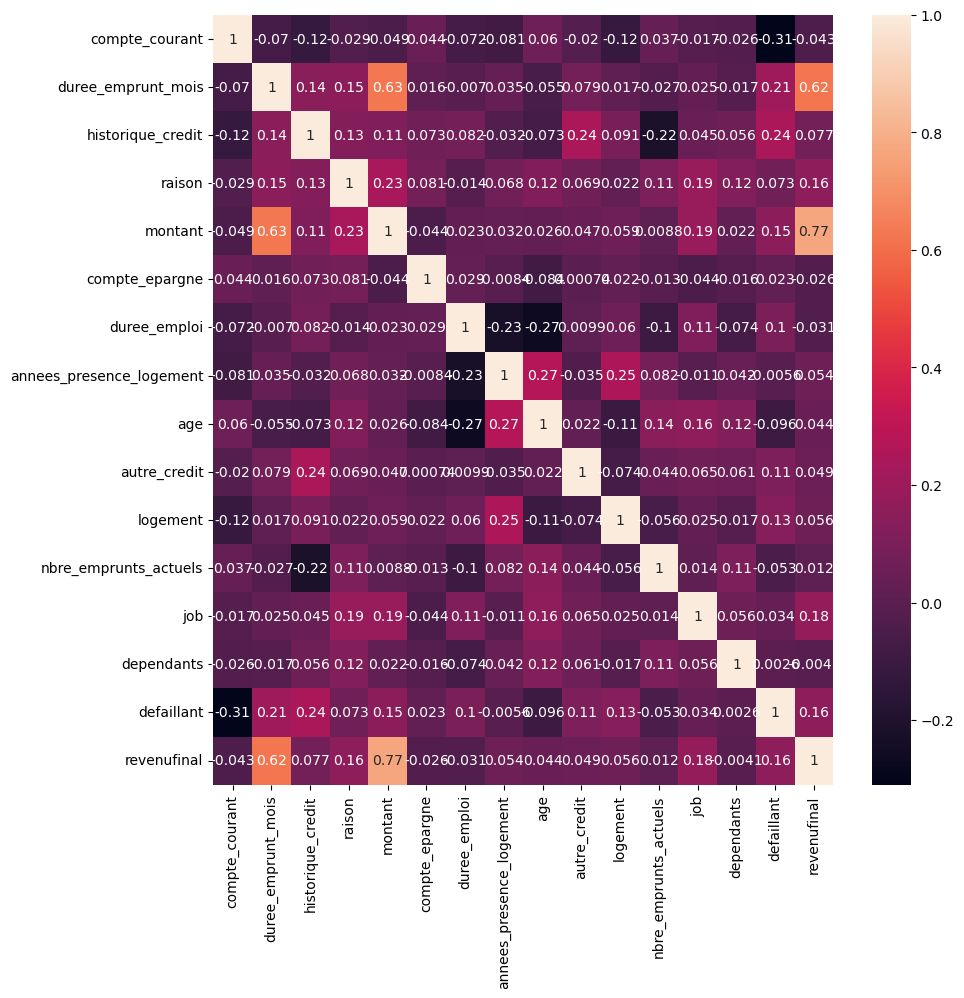

In [21]:
correlations = credit_without_na.corr()
f, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(correlations, annot = True);

On voit une forte corrélation entre le montant et le revenu finale et entre la durée d'emprunt et le revenu final cependant on déciode de garder les variables

## Encodage des variables catégorielles 

In [22]:
credit_encoded = pd.get_dummies(credit_without_na)
credit_encoded.head()

,compte_courant,duree_emprunt_mois,historique_credit,raison,montant,compte_epargne,duree_emploi,annees_presence_logement,age,autre_credit,logement,nbre_emprunts_actuels,job,dependants,defaillant,revenufinal
0,0,6,0,0,1169,0,0,4.0,67.0,0,0,2,0,0,0,8135.110140
1,1,48,1,0,5951,1,1,2.0,22.0,0,0,1,0,0,1,19334.307686
2,2,12,0,1,2096,1,2,3.0,49.0,0,0,1,1,1,0,4864.954258
3,0,42,1,0,7882,1,2,4.0,45.0,0,1,1,0,1,0,22152.947349
4,0,24,2,2,4870,1,1,4.0,53.0,0,1,2,0,1,1,23900.704144


In [23]:
credit_encoded.to_csv('credit_encoded.csv', index=False)